# Action Plan

- Download the data
    - Place the dataset in data/stroke folder !!! (dont forget to do this)
    - Load the data into a pandas dataframe?
- Preprocess the signals
    - Remove the noise
    - Normalize the data
- Feature extraction
    - Extract features from the signals
- Train the model
    - Train the model using the extracted features
- Evaluate the model
    - Evaluate the model using the test data


# Data Loading
- Load the data into a pandas dataframe from matlab file

In [1]:
# Load the data loadmat
from scipy.io import loadmat

# Load the data
data_dict = {
    "Patient_1" : {
        "Pre":{
            "Train": loadmat('data/stroke/P1_pre_training.mat'),
            "Test": loadmat('data/stroke/P1_pre_test.mat')
        },
        "Post":{
            "Train": loadmat('data/stroke/P1_post_training.mat'),
            "Test": loadmat('data/stroke/P1_post_test.mat')
        }
    },
    "Patient_2" : {
        "Pre":{
            "Train": loadmat('data/stroke/P2_pre_training.mat'),
            "Test": loadmat('data/stroke/P2_pre_test.mat')
        },
        "Post":{
            "Train": loadmat('data/stroke/P2_post_training.mat'),
            "Test": loadmat('data/stroke/P2_post_test.mat')
        }
    },
    "Patient_3" : {
        "Pre":{
            "Train": loadmat('data/stroke/P3_pre_training.mat'),
            "Test": loadmat('data/stroke/P3_pre_test.mat')
        },
        "Post":{
            "Train": loadmat('data/stroke/P3_post_training.mat'),
            "Test": loadmat('data/stroke/P3_post_test.mat')
        }
    },
}



In [2]:
# Trying to know the content of the data
print("Data keys:")

print(data_dict["Patient_1"]["Pre"]["Train"].keys())
'''fs - sampling rate Hz
y - EEG data (n_channels x n_samples)
trig - trigger data (+1 left hand MI , -1 right hand MI)
'''

print("F sampling rate:")
print(data_dict["Patient_1"]["Pre"]["Train"]["fs"])
print("EEG data shape (samples, channels):")
print(data_dict["Patient_1"]["Pre"]["Train"]["y"].shape)
print("Trigger data shape:")
print(data_dict["Patient_1"]["Pre"]["Train"]["trig"].shape)


'''Separate epochs for left and right hand MI'''
from scripts import load_mne

# data = load_mne(data_dict["Patient_1"]["Pre"]["Train"]["y"], data_dict["Patient_1"]["Pre"]["Train"]["fs"], data_dict["Patient_1"]["Pre"]["Train"]["trig"])
mne_data_dict = load_mne.mne_load_data(data_dict=data_dict)

# divide the eeg into epochs, each epoch is 8 seconds long (trigger is at 2 seconds, at 3.5 seconds )
# One session was composed by 240 MI repetitions on both hands, divided in 3 runs of 80 trials each.



Data keys:
dict_keys(['__header__', '__version__', '__globals__', 'fs', 'trig', 'y'])
F sampling rate:
[[256]]
EEG data shape (samples, channels):
(271816, 16)
Trigger data shape:
(271816, 1)
Patient: Patient_1, Session: Pre, Task: Train
EEG data shape (channels, samples): (16, 271816)
Trigger data shape: (271816, 1)
Creating RawArray with float64 data, n_channels=16, n_times=271816
    Range : 0 ... 271815 =      0.000 ...  1061.777 secs
Ready.
Creating epochs...
(80, 3)
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 1665 original time points ...
0 bad epochs dropped
Left hand MI epochs: (40, 16, 1665)
Right hand MI epochs: (40, 16, 1665)
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


Patient: Patient_1, Session: Pre, Task: Test
EEG data shape (channels, samples): (16, 204560)
Trigger data shape: (204560, 1

/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:89: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Left hand MI epochs: {left_epochs.get_data().shape}")
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:90: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Right hand MI epochs: {right_epochs.get_data().shape}")


Creating epochs...
(80, 3)
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 1665 original time points ...
0 bad epochs dropped
Left hand MI epochs: (40, 16, 1665)
Right hand MI epochs: (40, 16, 1665)
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


Patient: Patient_1, Session: Post, Task: Train
EEG data shape (channels, samples): (16, 197343)
Trigger data shape: (197343, 1)
Creating RawArray with float64 data, n_channels=16, n_times=197343
    Range : 0 ... 197342 =      0.000 ...   770.867 secs
Ready.


/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:89: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Left hand MI epochs: {left_epochs.get_data().shape}")
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:90: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Right hand MI epochs: {right_epochs.get_data().shape}")


Creating epochs...
(80, 3)
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 1665 original time points ...
0 bad epochs dropped
Left hand MI epochs: (40, 16, 1665)
Right hand MI epochs: (40, 16, 1665)
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


Patient: Patient_1, Session: Post, Task: Test
EEG data shape (channels, samples): (16, 194088)
Trigger data shape: (194088, 1)
Creating RawArray with float64 data, n_channels=16, n_times=194088
    Range : 0 ... 194087 =      0.000 ...   758.152 secs
Ready.


/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:89: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Left hand MI epochs: {left_epochs.get_data().shape}")
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:90: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Right hand MI epochs: {right_epochs.get_data().shape}")


Creating epochs...
(80, 3)
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 1665 original time points ...
0 bad epochs dropped
Left hand MI epochs: (40, 16, 1665)
Right hand MI epochs: (40, 16, 1665)
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


Patient: Patient_2, Session: Pre, Task: Train
EEG data shape (channels, samples): (16, 223112)
Trigger data shape: (223112, 1)
Creating RawArray with float64 data, n_channels=16, n_times=223112
    Range : 0 ... 223111 =      0.000 ...   871.527 secs
Ready.


/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:89: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Left hand MI epochs: {left_epochs.get_data().shape}")
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:90: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Right hand MI epochs: {right_epochs.get_data().shape}")


Creating epochs...
(80, 3)
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 1665 original time points ...
0 bad epochs dropped
Left hand MI epochs: (40, 16, 1665)
Right hand MI epochs: (40, 16, 1665)
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


Patient: Patient_2, Session: Pre, Task: Test
EEG data shape (channels, samples): (16, 199552)
Trigger data shape: (199552, 1)
Creating RawArray with float64 data, n_channels=16, n_times=199552
    Range : 0 ... 199551 =      0.000 ...   779.496 secs
Ready.


/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:89: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Left hand MI epochs: {left_epochs.get_data().shape}")
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:90: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Right hand MI epochs: {right_epochs.get_data().shape}")


Creating epochs...
(80, 3)
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 1665 original time points ...
0 bad epochs dropped
Left hand MI epochs: (40, 16, 1665)
Right hand MI epochs: (40, 16, 1665)
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


Patient: Patient_2, Session: Post, Task: Train
EEG data shape (channels, samples): (16, 216720)
Trigger data shape: (216720, 1)
Creating RawArray with float64 data, n_channels=16, n_times=216720
    Range : 0 ... 216719 =      0.000 ...   846.559 secs
Ready.


/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:89: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Left hand MI epochs: {left_epochs.get_data().shape}")
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:90: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Right hand MI epochs: {right_epochs.get_data().shape}")


Creating epochs...
(80, 3)
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 1665 original time points ...
0 bad epochs dropped
Left hand MI epochs: (40, 16, 1665)
Right hand MI epochs: (40, 16, 1665)
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


Patient: Patient_2, Session: Post, Task: Test
EEG data shape (channels, samples): (16, 233576)
Trigger data shape: (233576, 1)
Creating RawArray with float64 data, n_channels=16, n_times=233576
    Range : 0 ... 233575 =      0.000 ...   912.402 secs
Ready.


/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:89: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Left hand MI epochs: {left_epochs.get_data().shape}")
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:90: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Right hand MI epochs: {right_epochs.get_data().shape}")


Creating epochs...
(80, 3)
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 1665 original time points ...
0 bad epochs dropped
Left hand MI epochs: (40, 16, 1665)
Right hand MI epochs: (40, 16, 1665)
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


Patient: Patient_3, Session: Pre, Task: Train
EEG data shape (channels, samples): (16, 205536)
Trigger data shape: (205536, 1)
Creating RawArray with float64 data, n_channels=16, n_times=205536
    Range : 0 ... 205535 =      0.000 ...   802.871 secs
Ready.


/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:89: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Left hand MI epochs: {left_epochs.get_data().shape}")
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:90: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Right hand MI epochs: {right_epochs.get_data().shape}")


Creating epochs...
(80, 3)
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 1665 original time points ...
0 bad epochs dropped
Left hand MI epochs: (40, 16, 1665)
Right hand MI epochs: (40, 16, 1665)
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


Patient: Patient_3, Session: Pre, Task: Test
EEG data shape (channels, samples): (16, 248488)
Trigger data shape: (248488, 1)
Creating RawArray with float64 data, n_channels=16, n_times=248488
    Range : 0 ... 248487 =      0.000 ...   970.652 secs
Ready.


/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:89: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Left hand MI epochs: {left_epochs.get_data().shape}")
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:90: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Right hand MI epochs: {right_epochs.get_data().shape}")


Creating epochs...
(80, 3)
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 1665 original time points ...
0 bad epochs dropped
Left hand MI epochs: (40, 16, 1665)
Right hand MI epochs: (40, 16, 1665)
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


Patient: Patient_3, Session: Post, Task: Train
EEG data shape (channels, samples): (16, 206504)
Trigger data shape: (206504, 1)
Creating RawArray with float64 data, n_channels=16, n_times=206504
    Range : 0 ... 206503 =      0.000 ...   806.652 secs
Ready.


/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:89: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Left hand MI epochs: {left_epochs.get_data().shape}")
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:90: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Right hand MI epochs: {right_epochs.get_data().shape}")


Creating epochs...
(80, 3)
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 1665 original time points ...
0 bad epochs dropped
Left hand MI epochs: (40, 16, 1665)
Right hand MI epochs: (40, 16, 1665)
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


Patient: Patient_3, Session: Post, Task: Test
EEG data shape (channels, samples): (16, 218432)
Trigger data shape: (218432, 1)
Creating RawArray with float64 data, n_channels=16, n_times=218432
    Range : 0 ... 218431 =      0.000 ...   853.246 secs
Ready.


/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:89: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Left hand MI epochs: {left_epochs.get_data().shape}")
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:90: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Right hand MI epochs: {right_epochs.get_data().shape}")


Creating epochs...
(80, 3)
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 1665 original time points ...
0 bad epochs dropped
Left hand MI epochs: (40, 16, 1665)
Right hand MI epochs: (40, 16, 1665)
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.




/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:89: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Left hand MI epochs: {left_epochs.get_data().shape}")
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/scripts/load_mne.py:90: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Right hand MI epochs: {right_epochs.get_data().shape}")


(271816, 16)


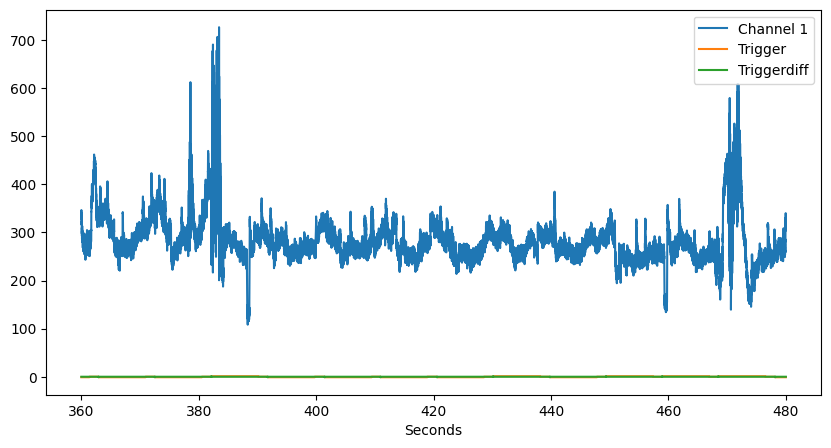

In [3]:
import numpy as np
# plot eeg and triggers for the first 10000 samples
import matplotlib.pyplot as plt

eeg_trigs = data_dict["Patient_1"]["Pre"]["Train"]["trig"][0, :]
out_trigs = np.zeros_like(eeg_trigs)
# find the triggers
idx_array = []
for i in range(len(eeg_trigs)):
    if (eeg_trigs[i] != eeg_trigs[i-1]):
        out_trigs.append(eeg_trigs[i])
        idx_array.append(i)


# Define the time axis and plot the data
plt.figure(figsize=(10, 5))
start_samples = 256 * 60 * 6
width_samples = 256 * 60 * 2
end_samples = width_samples+ start_samples
data = data_dict["Patient_1"]["Pre"]["Train"]["y"]
triggers = data_dict["Patient_1"]["Pre"]["Train"]["trig"]

print(data.shape)
time_axis = np.arange(start_samples, end_samples) / data_dict["Patient_1"]["Pre"]["Train"]["fs"][0][0]
plt.plot(time_axis, data[start_samples:end_samples, 0], label='Channel 1')
# plt.plot(time_axis, data[start_samples:end_samples, 1], label='Channel 2')

plt.plot(time_axis, triggers[start_samples:end_samples], label='Trigger')

triggerd = np.zeros_like(triggers, dtype=int)
triggerd[1:] = ((triggers[1:]-triggers[:-1])!=0) * (triggers[1:]!=0)
triggerd[triggerd!=0] = triggers[triggerd!=0]
events = np.column_stack((np.argwhere(triggerd)[:,0], np.zeros(sum(triggerd!=0), dtype=int),triggerd[triggerd!=0]))
# print(events)

plt.plot(time_axis, triggerd[start_samples:end_samples], label='Triggerdiff')

plt.xlabel('Seconds')
plt.legend()

plt.show()


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...
    Using multitaper spectrum estimation with 7 DPSS windows


/var/folders/c0/xxpj6hdj4633qbm0kh30wftc0000gn/T/ipykernel_22868/1423523605.py:18: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  patient_epochs[key].compute_psd().plot()
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/.venv/lib/python3.9/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Plotting power spectral density (dB=True).
Averaging across epochs...


/var/folders/c0/xxpj6hdj4633qbm0kh30wftc0000gn/T/ipykernel_22868/1423523605.py:18: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  patient_epochs[key].compute_psd().plot()
/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/.venv/lib/python3.9/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


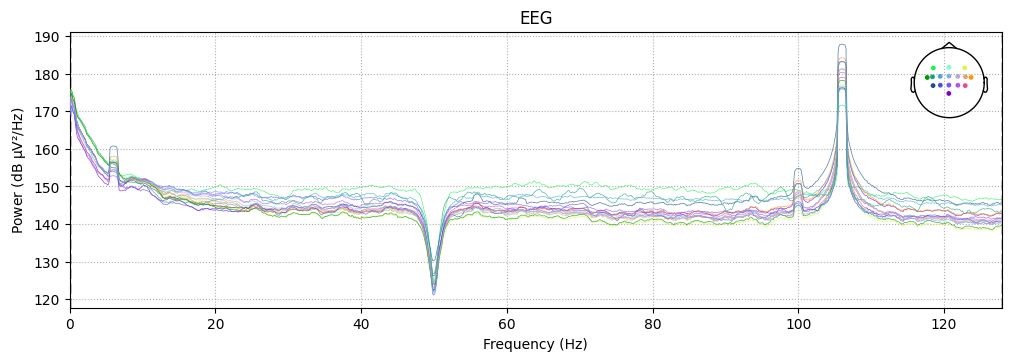

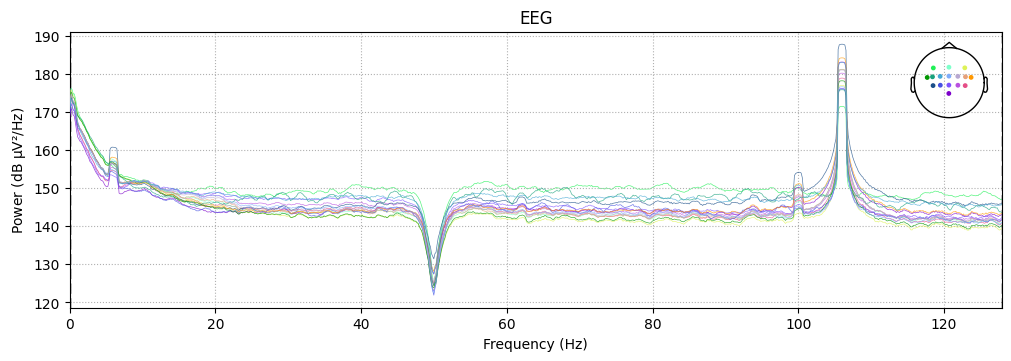

In [4]:
# mne plots
from scripts.spectro import plot_pseudospectrogram
import numpy as np
import matplotlib.pyplot as plt

# spectrogram, event related spectral perturbation (ERSP) and inter-trial coherence (ITC)

# SELECTING ONE PATIENT

patient_epochs = mne_data_dict["Patient_2"]["Pre"]["Train"]
# print(mne_data_dict["Patient_2"]["Post"].keys())
# print(patient_epochs)
# plot the spectrogram of the epoch using mne
for key in patient_epochs.keys():
    # plot for left and right
    # plot_pseudospectrogram(patient_epochs[key])
    # patient_epochs[key].plot_psd_topomap()
    patient_epochs[key].compute_psd().plot()

    

# Preprocessing

Bandpass 8, 50 Hz

Setting up band-pass filter from 8 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (1.652 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s


Setting up band-pass filter from 8 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (1.652 s)

Fitting ICA to data using 16 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
/var/folders/c0/xxpj6hdj4633qbm0kh30wftc0000gn/T/ipykernel_22868/2716479170.py:21: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs) # TODO: should be only on training


Selecting by number: 16 components
Fitting ICA took 13.2s.


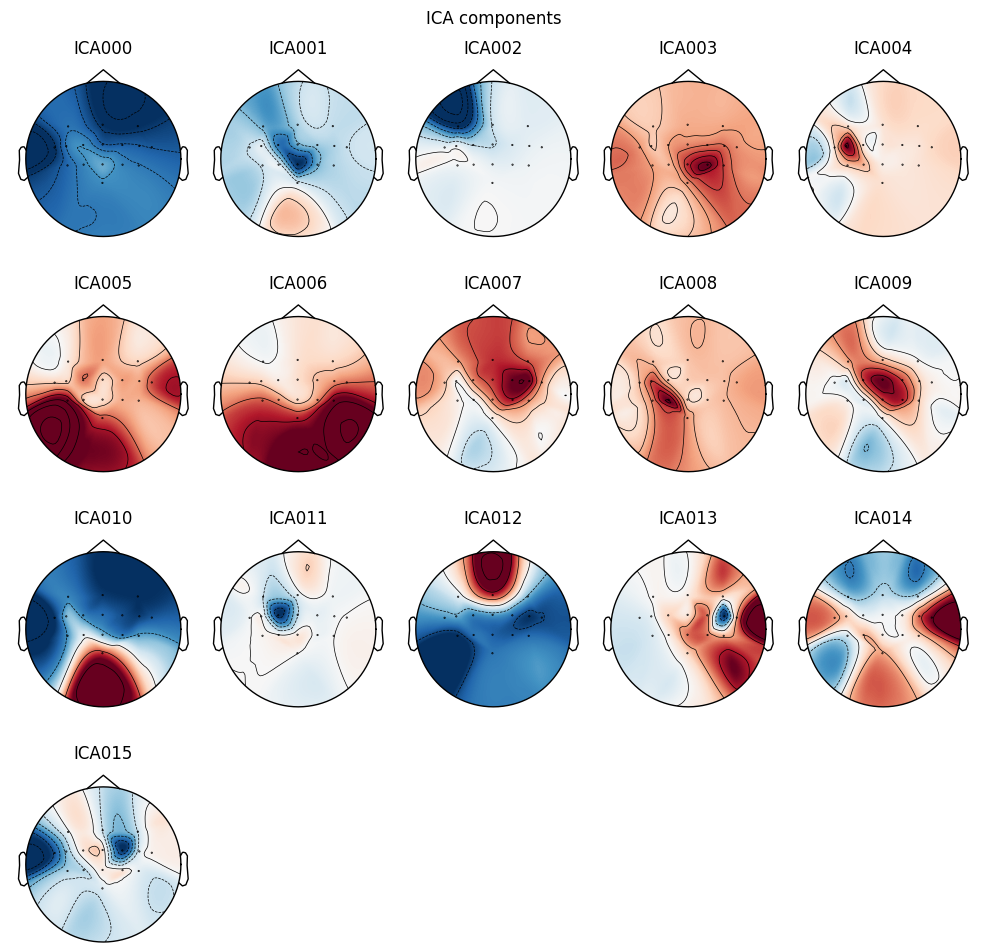

Applying ICA to Epochs instance
    Transforming to ICA space (16 components)
    Zeroing out 0 ICA components
    Projecting back using 16 PCA components


/var/folders/c0/xxpj6hdj4633qbm0kh30wftc0000gn/T/ipykernel_22868/2716479170.py:34: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epoch = ica.apply(epochs)


AttributeError: 'ICA' object has no attribute 'plot_forward'

In [7]:
# filter epochs using 3-50hz bandpass filter

patient_epochs["left"].filter(8, 50)
patient_epochs["right"].filter(8, 50)

# remove blinking artifacts?



'''
Many M/EEG signals including biological artifacts reflect non-Gaussian processes. 
Therefore PCA-based artifact rejection will likely perform worse at separating the signal from noise sources.
So we use ICA to remove artifacts
'''
from mne.preprocessing import ICA
epochs_clean = {
    "left":None,
    "right":None
}

for imagery in ["left","right"]:

    epochs = patient_epochs[imagery]
    # 3. Initialize and fit ICA
    ica = ICA(n_components=16, random_state=42)
    ica.fit(epochs) # TODO: should be only on training
    # 4. Identify artifact components (visualize and/or use detection methods)
    ica.plot_components()  # Visualize components
    

    # how to plot erps for each component
    # evokeds_ica = ica.get_evokeds(epochs) 
    # for i, evoked in enumerate(evokeds_ica):
    #     evoked.plot(title=f'ICA Component {i}')

    # ... Determine components to exclude (e.g., components 0 and 2)
    # ica.exclude = [0, 2]
    # 6. Reconstruct the EEG signal
    epoch = ica.apply(epochs)
    # epoch.plot_psd_topomap()
    ica.plot_forward()
    epochs_clean[imagery] = epoch


